In [1]:
import httpx
import base64
from rasterio.io import MemoryFile
from rasterio.plot import show
import numpy as np

In [2]:
URL = "https://cerulean-cloud-test-cloud-run-offset-tiles-4ac5c4-5qkjkyomta-ew.a.run.app"

/Users/rodrigoalmeida/.virtualenvs/cerulean-cloud/lib/python3.8/site-packages/rasterio/io.py:131: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  return DatasetReader(mempath, driver=driver, sharing=sharing, **kwargs)


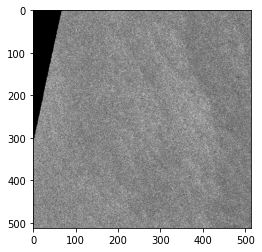

(3, 512, 512)


In [3]:
with open("../test/test_cerulean_cloud/fixtures/tile_512_512_3band.png", "rb") as src:
    with MemoryFile(src.read()) as memfile:
        with memfile.open() as img:
            show(img)
            print(img.read().shape)
        img_bytes = memfile.read()
encoded_img = base64.b64encode(img_bytes).decode("ascii")

In [11]:
inference_result = httpx.post(URL+"/predict", json={"image": encoded_img, "bounds": [1,2,3,4]}, timeout=None)
inference_result_2 = httpx.post(URL+"/predict", json={"image": encoded_img, "bounds": [1,2,3,4]}, timeout=None)
inference_result_3 = httpx.post(URL+"/predict", json={"image": encoded_img, "bounds": [1,2,3,4]}, timeout=None)


print(inference_result)

<Response [200 OK]>


In [12]:
print(inference_result.elapsed)
print(inference_result_2.elapsed)
print(inference_result_3.elapsed)
result = inference_result.json()
print(result.keys())

0:00:06.330834
0:00:06.150176
0:00:06.147221
dict_keys(['classes', 'confidence', 'bounds'])


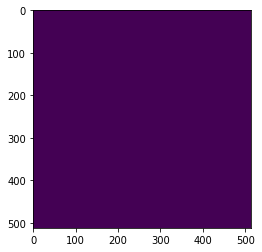

(1, 512, 512)


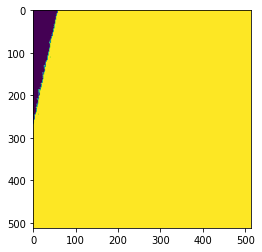

(1, 512, 512)
1


In [13]:
img_bytes = base64.b64decode(result["classes"])
with MemoryFile(img_bytes) as memfile:
        with memfile.open() as dataset:
            show(dataset)
            print(dataset.read().shape)

img_bytes = base64.b64decode(result["confidence"])
with MemoryFile(img_bytes) as memfile:
        with memfile.open() as dataset:
            show(dataset)
            array = dataset.read()
            print(array.shape)
            print(np.max(array))